In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import pandas as pd
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from Eco_function.eco_plot import *
import pickle
import matplotlib.gridspec as gridspec
tableau20=color20() # initial colors for plot;
sns.set(style="white")
from scipy.integrate import quad,quadrature
from scipy.stats import truncnorm
from scipy.stats import norm
fontsize=16
def integrmomentum1(x, a):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)*(x+a)
def integrmomentum2(x, a):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)*(x+a)**2

# Fig1: Dynamics

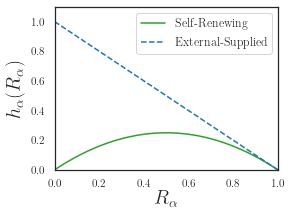

In [4]:
f, ax1 = plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontsize=20
def fun(gamma,R):
    return R**gamma/(R**gamma+1.0)
R=np.linspace(0,1,1000)

ax1.plot(R,R*(1-R), label= 'Self-Renewing',c=tableau20[4])
ax1.plot(R,(1-R), label= 'External-Supplied',c=tableau20[0],linestyle='dashed')

#plt.plot(R, 1.0*np.ones(len(R)), label= 'constant',c=tableau20[4])
ax1.set_xlabel(r'$\displaystyle R_\alpha$',fontsize=fontsize)    
ax1.set_ylabel(r'$\displaystyle h_\alpha(R_\alpha)$',fontsize=fontsize) 
ax1.set_xlim(left=0)
ax1.set_xlim(right=1.0)
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=1.1)
ax1.legend(fontsize=12)
f.set_size_inches(4, 3)
f.savefig('Supply.pdf', dpi=300, bbox_inches='tight',transparent=True)

# Fig2: Simulations
## Gaussian

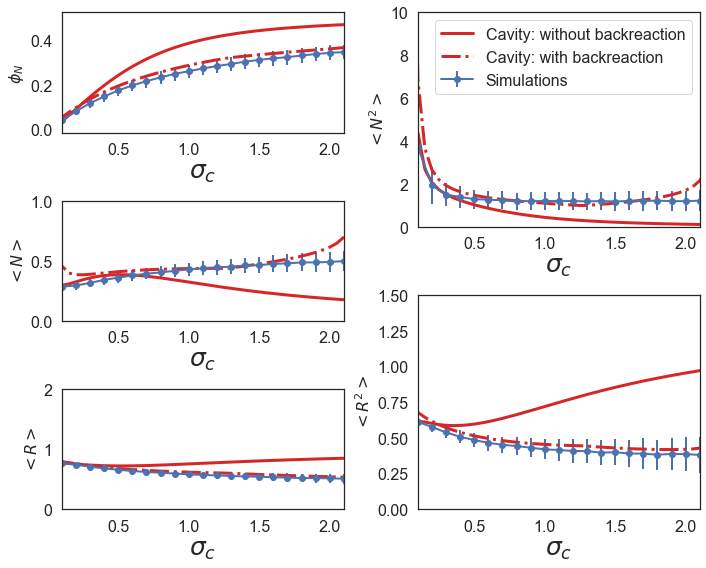

In [71]:
k=1.
file_name='Data/Community_gaussian_null_linear_CVXOPT_log_sigc.csv'
data0=pd.read_csv(file_name)
data0=data0[data0['K']==k]

file_name='Data/Cavity_linear_gaussian.csv'
data1=pd.read_csv(file_name)
data1=data1[data1['K']==k]

file_name='Data/Cavity_linear_1st_gaussian.csv'
data2=pd.read_csv(file_name)
data2=data2[data2['K']==k]

file_name='Data/Cavity_linear_3rd_gaussian.csv'
data3=pd.read_csv(file_name)
data3=data3[data3['K']==k]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=6, ncols=2)
fontsize=25
ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[2:4, 0])
ax31 = fig.add_subplot(gs[4:, 0])
ax12 = fig.add_subplot(gs[:3, 1])
ax22 = fig.add_subplot(gs[3:, 1])
axs=[ax11 ,ax21,ax31,ax12, ax22]
Y1=['phi_N', 'mean_N', 'mean_R', 'q_N', 'q_R']
Y1_error=['phi_N_bar', 'mean_N_bar', 'mean_R_bar', 'q_N_bar', 'q_R_bar']
Y2=['phiN', 'N', 'R', 'qN', 'qR']
Labels=[r'$\phi_N$', '$<N>$', '$<R>$',r'$<N^2>$',r'$<R^2>$']
for i in range(5):
    ax=axs[i]
    ax.tick_params(axis='both', which='major', labelsize=16)
    indices=np.arange(0,len(data0['epsilon']),2)
    ax.errorbar(data0['epsilon'][indices], data0[Y1[i]][indices], yerr=data0[Y1_error[i]][indices], label='Simulations', fmt='o-',ecolor='b',c='b',linewidth=2)
    #ax.plot(data0['epsilon'], data0[Y1[i]], label='Simulations',linestyle='--',linewidth=3,c=tableau20[0])
    ax.plot(data1['Sigc'], data1[Y2[i]],linestyle='-',label='Cavity: without backreaction',linewidth=3,c=tableau20[6])
    ax.plot(data2['Sigc'], data2[Y2[i]],linestyle='-.',label='Cavity: with backreaction',linewidth=3,c=tableau20[6])
    #ax.plot(data3['Sigc'], data3[Y2[i]],linestyle=':',label='Cavity: $2^{nd}$',linewidth=3,c=tableau20[6])
    ax.set_xlabel(r'$\sigma_c$',fontsize=fontsize)
    ax.set_ylabel(Labels[i],fontsize=16)
    ax.set_xlim(0.1,2.1)
    if i==1: ax.set_ylim(0.,1)
    if i==2: ax.set_ylim(0.,2)
    if i==4: ax.set_ylim(0.,1.5)
    if i==3:
        ax.set_ylim(0.,10)
        ax.legend(fontsize=16,loc='upper right')
fig.tight_layout()
fig_name='Cavity_simulations_gaussian.pdf'
fig.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

## Uniform

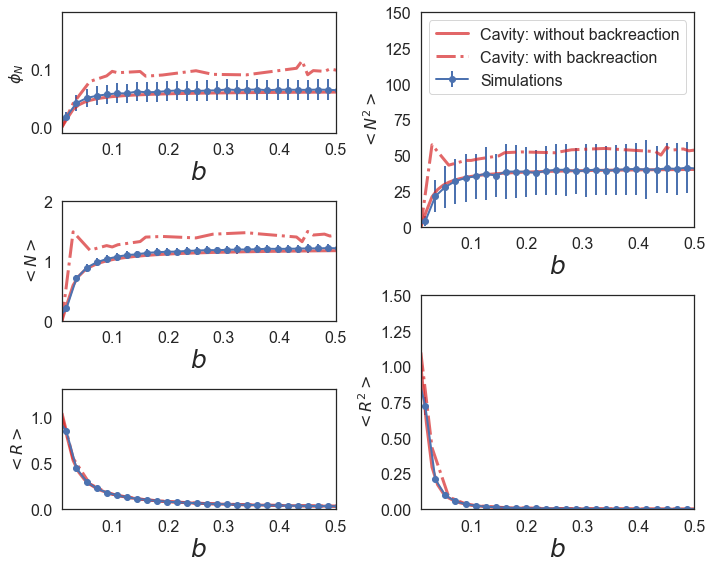

In [54]:
k=1.
S=100
file_name='Data/Community_uniform_null_linear_CVXOPT_log_sigc.csv'
data0=pd.read_csv(file_name)
data0=data0[data0['K']==k]

file_name='Data/Cavity_linear_uniform.csv'
data1=pd.read_csv(file_name)
data1=data1[data1['K']==k]

file_name='Data/Cavity_linear_1st_uniform.csv'
data2=pd.read_csv(file_name)
data2=data2[data2['K']==k]
data2=data2[data2['qR']<1.2]
data2=data2[data2['phiN']<0.2]

file_name='Data/Cavity_linear_2nd_uniform.csv'
data3=pd.read_csv(file_name)
data3=data3[data3['K']==k]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=6, ncols=2)
fontsize=25
ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[2:4, 0])
ax31 = fig.add_subplot(gs[4:, 0])
ax12 = fig.add_subplot(gs[:3, 1])
ax22 = fig.add_subplot(gs[3:, 1])
axs=[ax11 ,ax21,ax31,ax12, ax22]
Y1=['phi_N', 'mean_N', 'mean_R', 'q_N', 'q_R']
Y1_error=['phi_N_bar', 'mean_N_bar', 'mean_R_bar', 'q_N_bar', 'q_R_bar']
Y2=['phiN', 'N', 'R', 'qN', 'qR']
Labels=[r'$\phi_N$', '$<N>$', '$<R>$',r'$<N^2>$',r'$<R^2>$']
for i in range(5):
    ax=axs[i]
    ax.tick_params(axis='both', which='major', labelsize=16)
    indices=np.arange(0,len(data0['epsilon']),18)
    ax.errorbar(np.asarray(data0['epsilon'])[indices], np.asarray(data0[Y1[i]])[indices], yerr=np.asarray(data0[Y1_error[i]])[indices], label='Simulations', fmt='o-',ecolor='b',c='b',linewidth=2)
    #ax.plot(data0['epsilon'], data0[Y1[i]],label='Simulations',linestyle='--',linewidth=3,c=tableau20[0])
    ax.plot(data1['Mu']*2/S, data1[Y2[i]],linestyle='-',label='Cavity: without backreaction',alpha=0.7,linewidth=3,c=tableau20[6])
    ax.plot(data2['Mu']*2/S, data2[Y2[i]],linestyle='-.',label='Cavity: with backreaction',alpha=0.7,linewidth=3,c=tableau20[6])
    #ax.plot(data3['Mu']*2/S, data3[Y2[i]],linestyle=':',label='Cavity: $1^{st}$',alpha=0.7,linewidth=3,c=tableau20[6])
    ax.set_xlabel(r'$b$',fontsize=fontsize)
    ax.set_ylabel(Labels[i],fontsize=16)
    ax.set_xlim(0.01,0.5)
    if i==1: ax.set_ylim(0.,2)
    if i==2: ax.set_ylim(0.,1.3)
    if i==4: ax.set_ylim(0.,1.5)
    if i==3:
        ax.set_ylim(0.,150)
        ax.legend(fontsize=16,loc='upper right')
fig.tight_layout()
fig_name='Cavity_simulations_uniform.pdf'
fig.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

## Binomial

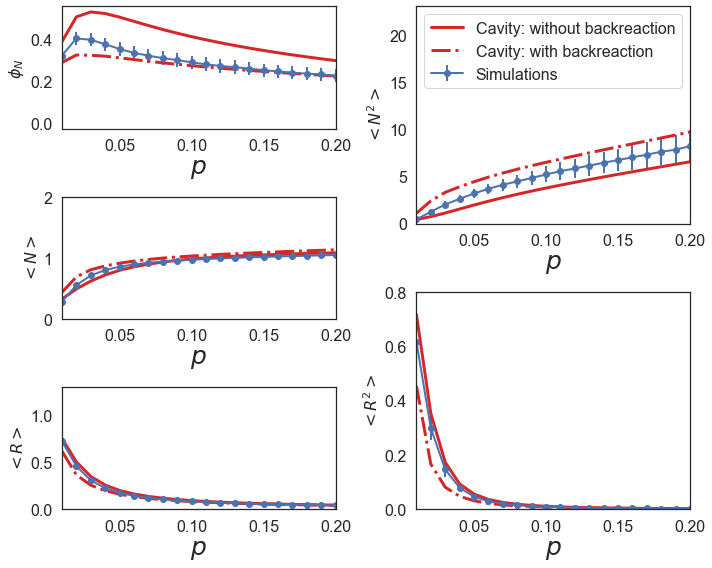

In [55]:
k=1.
S=100
file_name='Data/Community_binomial_null_linear_CVXOPT_log_sigc.csv'
data0=pd.read_csv(file_name)
data0=data0[data0['K']==k]

file_name='Data/Cavity_linear_binomial.csv'
data1=pd.read_csv(file_name)
data1=data1[data1['K']==k]

file_name='Data/Cavity_linear_1st_binomial.csv'
data2=pd.read_csv(file_name)
data2=data2[data2['K']==k]
data2=data2[data2['phiN']>0.1]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=6, ncols=2)
fontsize=25
ax11 = fig.add_subplot(gs[:2, 0])
ax21 = fig.add_subplot(gs[2:4, 0])
ax31 = fig.add_subplot(gs[4:, 0])
ax12 = fig.add_subplot(gs[:3, 1])
ax22 = fig.add_subplot(gs[3:, 1])
axs=[ax11 ,ax21,ax31,ax12, ax22]
Y1=['phi_N', 'mean_N', 'mean_R', 'q_N', 'q_R']
Y1_error=['phi_N_bar', 'mean_N_bar', 'mean_R_bar', 'q_N_bar', 'q_R_bar']
Y2=['phiN', 'N', 'R', 'qN', 'qR']
Labels=[r'$\phi_N$', '$<N>$', '$<R>$',r'$<N^2>$',r'$<R^2>$']
for i in range(5):
    ax=axs[i]
    ax.tick_params(axis='both', which='major', labelsize=16)
    indices=np.arange(0,len(data0['epsilon']),1)
    ax.errorbar(np.asarray(data0['epsilon'])[indices], np.asarray(data0[Y1[i]])[indices], yerr=np.asarray(data0[Y1_error[i]])[indices], label='Simulations', fmt='o-',ecolor='b',c='b',linewidth=2)
    #ax.plot(data0['epsilon'], data0[Y1[i]],label='Simulations',linestyle='--',linewidth=3,c=tableau20[0])
    ax.plot(data1['Mu']/S, data1[Y2[i]],linestyle='-',label='Cavity: without backreaction',linewidth=3,c=tableau20[6])
    ax.plot(data2['Mu']/S, data2[Y2[i]],linestyle='-.',label='Cavity: with backreaction',linewidth=3,c=tableau20[6])
    ax.set_xlabel(r'$p$',fontsize=fontsize)
    ax.set_ylabel(Labels[i],fontsize=16)
    ax.set_xlim(0.01,0.2)
    if i==1: ax.set_ylim(0.,2)
    if i==2: ax.set_ylim(0.,1.3)
    if i==4: ax.set_ylim(0.,0.8)
    if i==3:
        ax.set_ylim(0.,23)
        ax.legend(fontsize=16,loc='upper left')
fig.tight_layout()
fig_name='Cavity_simulations_binomial.pdf'
fig.savefig(fig_name, dpi=300,bbox_inches='tight',transparent='True')

# Species Packing Bounds
## Quadratic

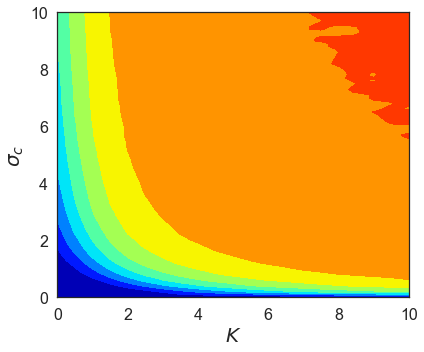

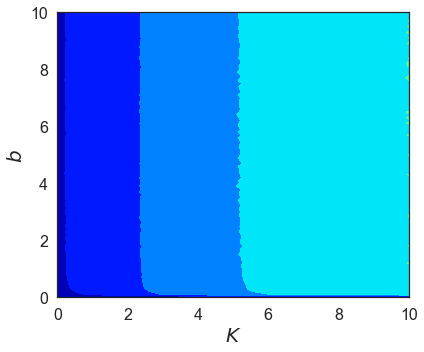

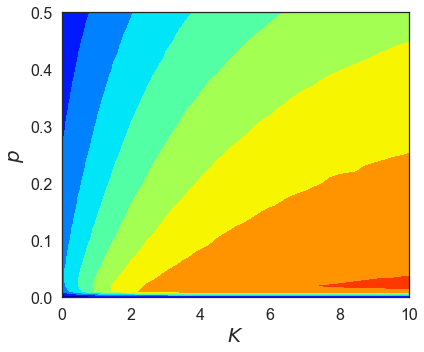

In [80]:
for noise in ['gaussian', 'uniform', 'binomial']:
    file_name='Data/Community_'+noise+'_null_quadratic_CVXOPT_linear_map.csv'
    data=pd.read_csv(file_name)
    X=data['K']
    Y=data['epsilon']
    Z=data['Survive']/100
    Points=np.zeros((len(X),2))
    Points[:,0]=X
    Points[:,1]=Y
    fontsize=20
    methods = ['linear','cubic']
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.tick_params(axis='both', which='major', labelsize=16)
    if noise== 'gaussian':
        grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0., 10.1, 0.1))
        ax.set_ylabel(r'$\sigma_c$',fontsize=fontsize)
    elif noise== 'uniform':
        grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0., 10.1, 0.1))
        ax.set_ylabel(r'$b$',fontsize=fontsize)
    elif noise== 'binomial':
        ax.set_ylabel(r'$p$',fontsize=fontsize)
        grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0., 0.51, 0.01))
    zi = griddata((X, Y), Z, (grid_x, grid_y), method='linear')
    v = np.linspace(0, 1.1, 11, endpoint=False)
    cs = ax.contourf(grid_x, grid_y, zi,levels=v,cmap='jet')
    #cbar = fig.colorbar(cs,ticks=v)
    #ax.set_xscale("log") 
    #ax.set_yscale("log") 
    ax.set_xlabel(r'$K$',rotation=0,fontsize=fontsize)
    cbar.set_label(r'$\frac{S^*}{M}$', labelpad=-30, y=-0.02, rotation=0,fontsize=fontsize)
    fig.tight_layout()
    file='Ksigc_'+noise+'_qu.pdf'
    fig.savefig(file,dpi=300)

## Linear

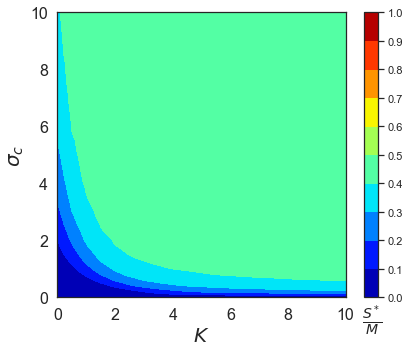

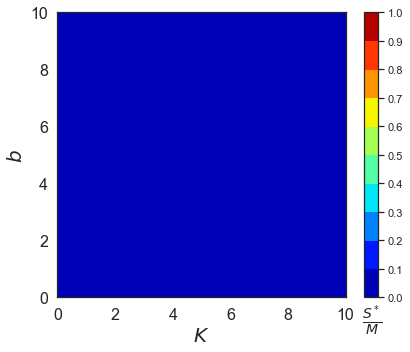

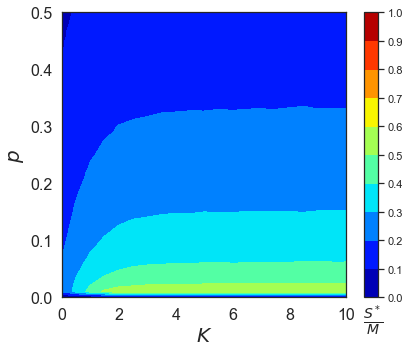

In [82]:
for noise in ['gaussian', 'uniform', 'binomial']:
    file_name='Data/Community_'+noise+'_null_linear_CVXOPT_linear_map.csv'
    data=pd.read_csv(file_name)
    X=data['K']
    Y=data['epsilon']
    Z=data['Survive']/100
    Points=np.zeros((len(X),2))
    Points[:,0]=X
    Points[:,1]=Y
    fontsize=20
    methods = ['linear','cubic']
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.tick_params(axis='both', which='major', labelsize=16)
    if noise== 'gaussian':
        grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0., 10.1, 0.1))
        ax.set_ylabel(r'$\sigma_c$',fontsize=fontsize)
    elif noise== 'uniform':
        grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0., 10.1, 0.1))
        ax.set_ylabel(r'$b$',fontsize=fontsize)
    elif noise== 'binomial':
        ax.set_ylabel(r'$p$',fontsize=fontsize)
        grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0.0, 0.51, 0.01))
    zi = griddata((X, Y), Z, (grid_x, grid_y), method='linear')
    v = np.linspace(0, 1.1, 11, endpoint=False)
    cs = ax.contourf(grid_x, grid_y, zi,levels=v,cmap='jet')
    cbar = fig.colorbar(cs,ticks=v)
    #ax.set_xscale("log") 
    #ax.set_yscale("log") 
    ax.set_xlabel(r'$K$',rotation=0,fontsize=fontsize)
    cbar.set_label(r'$\frac{S^*}{M}$', labelpad=-30, y=-0.02, rotation=0,fontsize=fontsize)
    fig.tight_layout()
    file='Ksigc_'+noise+'_li.pdf'
    fig.savefig(file,dpi=300)

### Resources Abundance

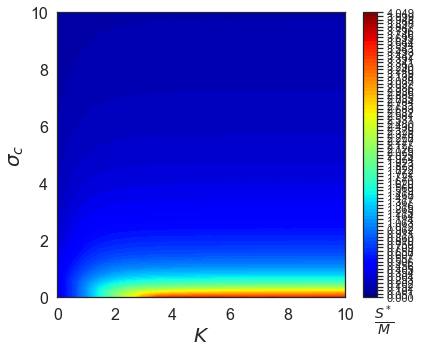

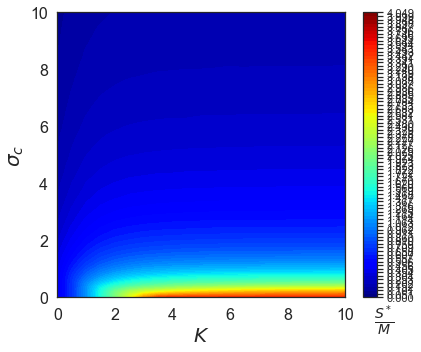

In [32]:
for dynamics in ['linear', 'quadratic']:
    file_name='Data/Community_gaussian_null_'+dynamics+ '_CVXOPT_linear_map.csv'
    data=pd.read_csv(file_name)
    X=data['K']
    Y=data['epsilon']
    Z=data['mean_R']
    Points=np.zeros((len(X),2))
    Points[:,0]=X
    Points[:,1]=Y
    fontsize=20
    methods = ['linear','cubic']
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.tick_params(axis='both', which='major', labelsize=16)
    grid_x, grid_y = np.meshgrid(np.arange(0., 10.1, 0.5), np.arange(0., 10.1, 0.1))
    ax.set_ylabel(r'$\sigma_c$',fontsize=fontsize)
    zi = griddata((X, Y), Z, (grid_x, grid_y), method='cubic')
    v = np.linspace(0, 4.1, 81, endpoint=False)
    cs = ax.contourf(grid_x, grid_y, zi,levels=v,cmap='jet')
    cbar = fig.colorbar(cs,ticks=v)
    #ax.set_xscale("log") 
    #ax.set_yscale("log") 
    ax.set_xlabel(r'$K$',rotation=0,fontsize=fontsize)
    cbar.set_label(r'$\frac{S^*}{M}$', labelpad=-30, y=-0.02, rotation=0,fontsize=fontsize)
    fig.tight_layout()
    file='Rsigc_'+dynamics+'_heatmap.pdf'
    fig.savefig(file,dpi=300)

## Check the numerical methods

50.344


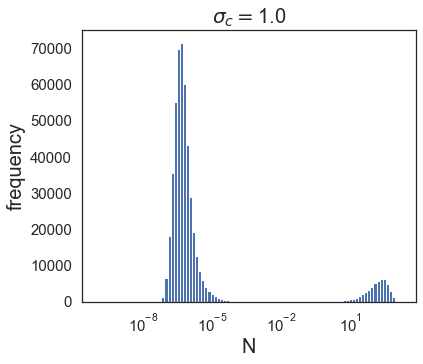

50.134


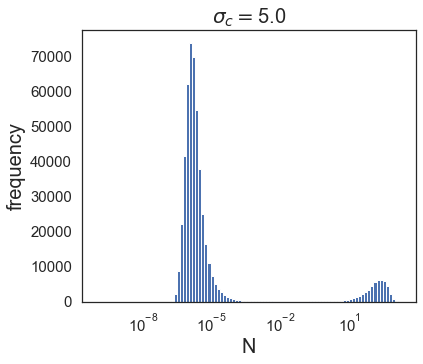

50.73


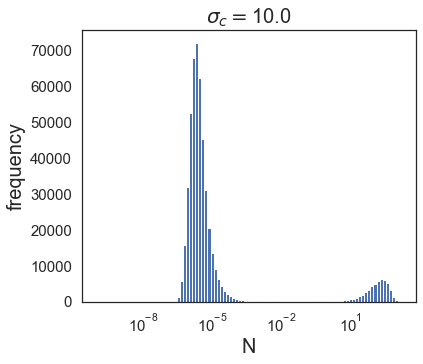

In [100]:
A_type='gaussian'
#A_type='uniform'
B_type='null'
sigc=1.
n_bins=100
for sigc in [1. , 5. ,10.]:
    filename='Simulation_data/Community_'+A_type +'_'+B_type+'_sigc_'+str(sigc) +'.pkl'
    Rs, Ns, packing, lams= pickle.load( open( filename, "rb" ) )
    N=np.asarray(Ns)
    N[N<1e-2]=0
    print(np.count_nonzero(N)/len(N)*500)

    fig, ax = plt.subplots(1,1,figsize=(6, 5))
    ax.set_title(r'$\sigma_c=$'+str(sigc),fontsize=20)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.hist(Ns,bins = 10 ** np.linspace(np.log10(1e-10), np.log10(np.amax(Ns)), n_bins))
    ax.set_xscale("log")
    ax.set_xlabel('N',fontsize=20)
    ax.set_ylabel('frequency',fontsize=20)
    plt.show()
    fig.tight_layout()
    fig_name='Fig_NR_org'+str(sigc)+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)

99.8235294117647


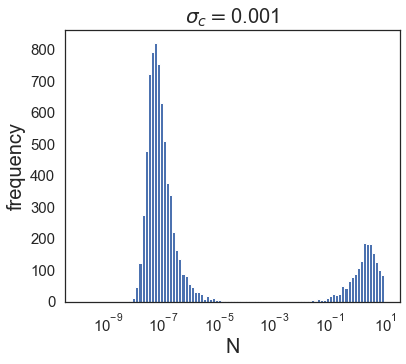

99.70588235294117


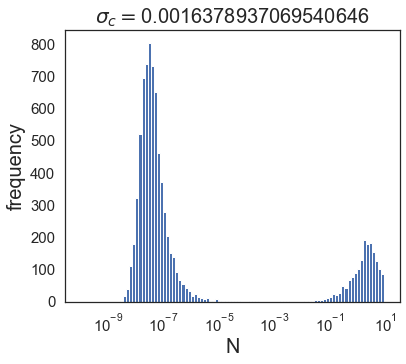

99.88235294117646


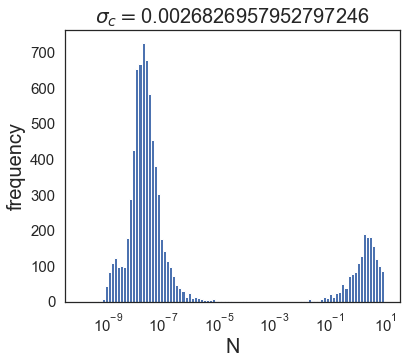

99.3529411764706


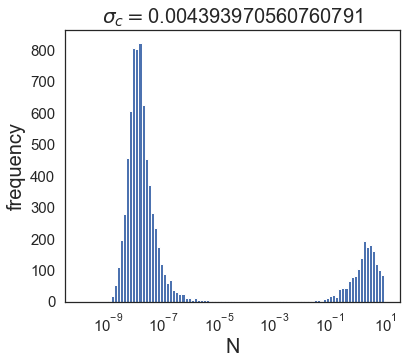

99.28571428571428


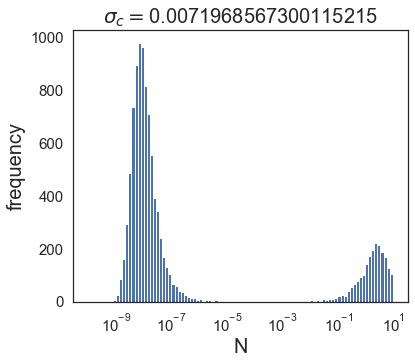

98.57142857142857


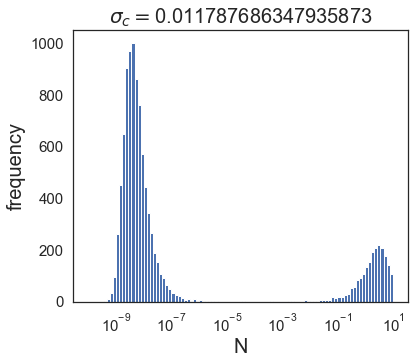

97.8


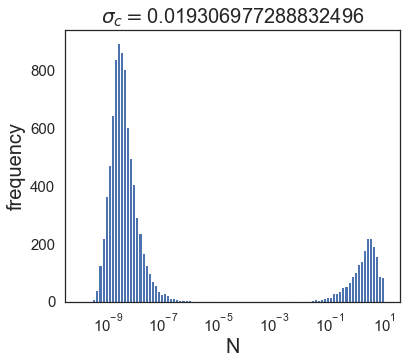

96.66666666666667


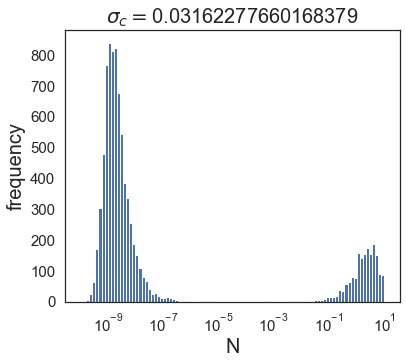

94.95833333333334


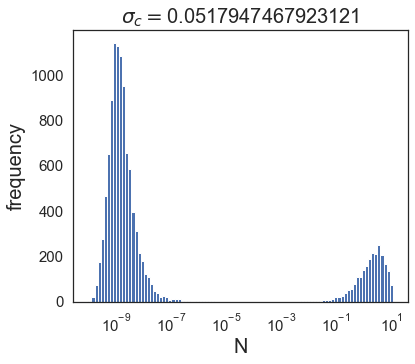

94.25


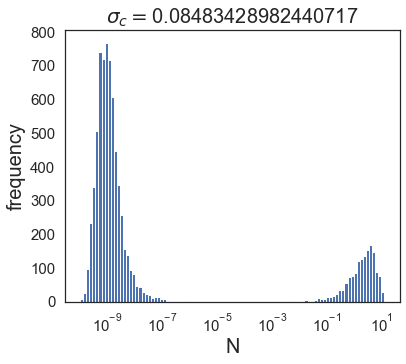

90.39999999999999


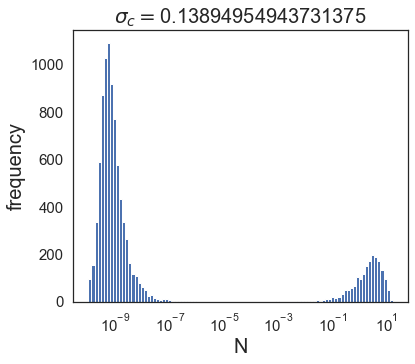

85.63636363636364


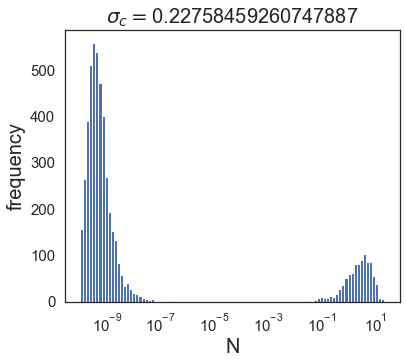

77.13333333333333


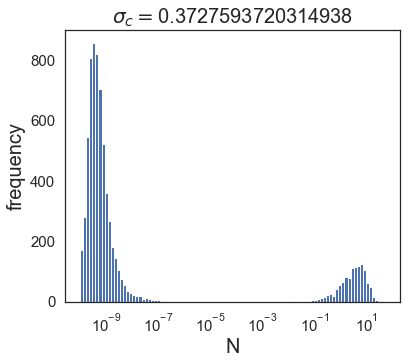

70.54545454545455


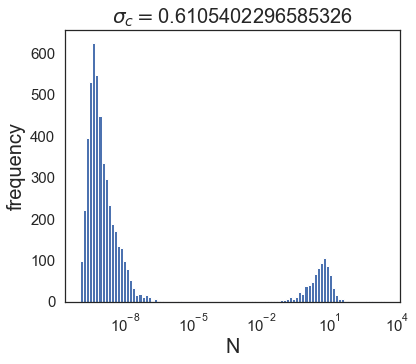

ZeroDivisionError: division by zero

In [38]:
Simulation_type='CVXOPT'
Metabolic_type='add'
sigc=1.
K=10.
n_bins=100
ranges=np.logspace(-3.0, -0., num=15)
for sigc in ranges:
    filename='abundance'+'K_'+str(K)+'Sigc_'+str(round(sigc,3))+Simulation_type+Metabolic_type+'.pkl'
    #filename='abundance'+'K_'+str(K)+'Sigc_'+str(sigc)+Simulation_type+'.pkl'
    Rs, Ns, packing, lams= pickle.load( open( filename, "rb" ) )
    N=np.asarray(Ns)
    N[N<1e-2]=0
    print(np.count_nonzero(N)/len(N)*500)

    fig, ax = plt.subplots(1,1,figsize=(6, 5))
    ax.set_title(r'$\sigma_c=$'+str(sigc),fontsize=20)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.hist(Ns,bins = 10 ** np.linspace(np.log10(1e-10), np.log10(np.amax(Ns)), n_bins))
    ax.set_xscale("log")
    ax.set_xlabel('N',fontsize=20)
    ax.set_ylabel('frequency',fontsize=20)
    plt.show()
    fig.tight_layout()
    fig_name='Fig_NR_org'+str(sigc)+'.pdf'
    fig.savefig(fig_name, dpi=300, transparent=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


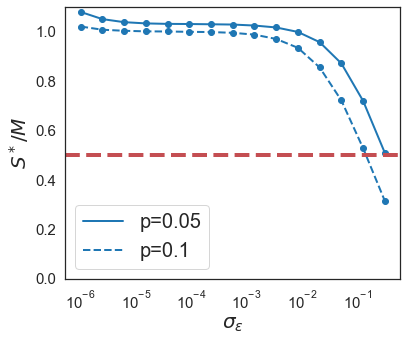

In [2]:
k=1.
S=100
file_name='Community_binomial_null_linear_CVXOPT_scale_log_sigc_1.csv'
data=pd.read_csv(file_name)
fig, ax = plt.subplots(1,1,figsize=(6, 5))
data1=data[data['epsilon']==0.05]
ax.plot(data1['epsilon_Metabolic'], data1['Survive']/S,linestyle='-',linewidth=2,c=tableau20[0],label='p=0.05')
ax.scatter(data1['epsilon_Metabolic'], data1['Survive']/S, c=tableau20[0])
data2=data[data['epsilon']==0.1]
ax.plot(data2['epsilon_Metabolic'], data2['Survive']/S,linestyle='--',linewidth=2,c=tableau20[0],label='p=0.1')
ax.scatter(data2['epsilon_Metabolic'], data2['Survive']/S, c=tableau20[0])
ax.set_xscale("log")
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.axhline(y=50/S,linewidth=4, color='r',linestyle='--')
ax.axhline(y=50/S,linewidth=4, color='k',linestyle='--')
ax.set_xlabel(r'$\sigma_\epsilon$',fontsize=20)
ax.set_ylabel(r'$S^*/M$',fontsize=20)
ax.legend(fontsize=20)
ax.set_ylim([0,1.1])
plt.show()
fig.tight_layout()
fig_name='Fig_metabolic_scale_phiN'+'.pdf'
fig.savefig(fig_name, dpi=300, transparent=True)